# Lab Project 1
# Part 2: Digital Pulse Processing

## Introduction

## Goals

## Procedure

---

### Before starting
Importing libraries and initializing the detector parameters. Do not change any value if you are not sure of what they mean.

In [28]:
%matplotlib widget
import udma
import numpy as np
import matplotlib.pyplot as plt
import time
from dppparameters import DppParameters

# Total trace length (samples). This value must match the Vivado Block Design settings.
TRACE_LEN = 2048     # Number of samples to be recorded
SAMPLING_RATE = 50e6 # Sampling rate (fs) of the ADC (50 Msps)
ADC_RESOLUTION = 14  # Resolution of the ADC
DC_OFFSET = (2**ADC_RESOLUTION // 2)

### Digital pulse processor parameters

Once you are satisfied with the fitting results, you may proceed to compute the digital pulse processor (DPP) parameters that will be executed in the FPGA.

The two main components that require fine-tuned parameters in the next Laboratory session are:
- Pulse shaper: it transforms the incoming pulses into a trapezoid with amplitude proportional to the incoming energy of the detected event.
- Peak detector: finds individual pulse events, fed from the pulse shaper output.

Execute the following commands to translate the fitted parameters into a 32-bit unsigned representation that will be deployed in the FPGA processing blocks in the next laboratory session.

In [29]:
TAU_DECAY = 5e-6
TAU_RISE  = 4.7e-6

In [30]:
dppParams = DppParameters(samplingRate = SAMPLING_RATE) # ADC sampling rate (50 Msps)

In [31]:
dppParams.computeParamsShaper(
    tauD = TAU_DECAY,
    tauR = TAU_RISE
)

b00_32_0 = 1501699290
b10_32_0 = 16710241
b20_32_0 = 16705975
na_32_0 = 122
nb_32_0 = 127
na_inv_32_0 = 268435
dc_offset_32_0 = 0
invertoffset_dc_offset_32_0 = 0
flags_32_0 = 0


In [33]:
dppParams.computeParamsPeakD()

x_delay_32_0 = 152
x_noise_32_0 = 246
x_min_32_0 = 492
x_max_32_0 = 32752


---

In [3]:
IP_ADDR = '192.168.1.10'
IP_PORT = 7

In [4]:
zedBoard = udma.UDMA_CLASS(IP_ADDR, IP_PORT)

In [5]:
zedBoard.connect()
zedBoard.log(0)

[(5,), 0]

### Constants definition

In [6]:
# Shaper parameters
b00_32_0 = 315736579
b10_32_0 = 16710241
b20_32_0 = 16078269
na_32_0 = 122
nb_32_0 = 127
na_inv_32_0 = 268435
dc_offset_32_0 = 0
invertoffset_dc_offset_32_0 = 0
flags = 0

# Peak detector parameters
x_delay_32_0 = 152
x_noise_32 = 546
x_min_32_0 = 492
x_max_32_0 = 32752
x_en_pkd = 4

registerValues = np.array([
    b10_32_0,
    na_32_0,
    nb_32_0,
    na_inv_32_0,
    b00_32_0,
    b20_32_0,
    dc_offset_32_0,
    invertoffset_dc_offset_32_0,
    flags,
    x_delay_32_0,
    x_noise_32,
    x_min_32_0,
    x_max_32_0,
    x_en_pkd
    ]).astype(np.uint32)

In [7]:
for i in range(len(registerValues)):
    _ = zedBoard.write_reg(i, registerValues[i])

## Spectrum from DP-RAM

In [8]:
zedBoard.write_ram(0x00, 0x00, TRACE_LEN, 0x01, np.zeros(TRACE_LEN))

[(1, 2048), 0]

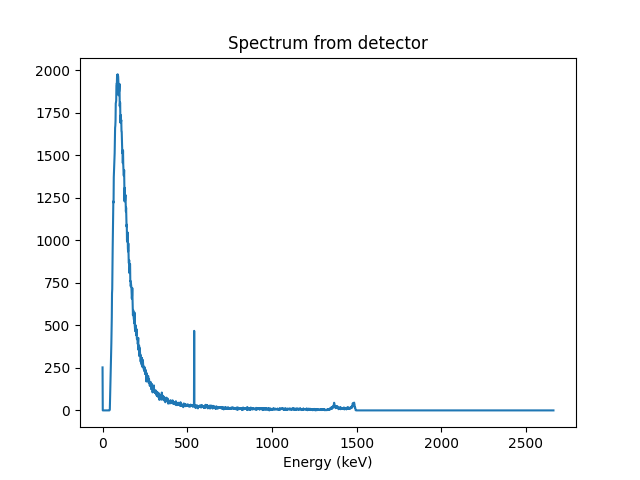

In [38]:
spectrum = zedBoard.read_ram(0, TRACE_LEN, 1)[1]
spectrum = np.array(spectrum).astype(np.int16)

xAxis = np.linspace(0, (TRACE_LEN*1.30), TRACE_LEN)

plt.figure()
plt.title("Spectrum from detector")
plt.plot(xAxis, spectrum, '-')
plt.xlabel("Energy (keV)")
# plt.yscale('log')
plt.show()

In [47]:
f = open('./temp.txt', 'w')
for i in spectrum:
    f.write(str(i) + '\n')
    
f.close()